## Unsupervised learning performed on the Breast Cancer Wisconsin (Diagnostic) Data Set

In order to illustrate a clustering analysis combined with a PCA analysis, we used human breast mass data coming from [the UIC machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  

**Data Set Information**:

Attribute Information:

 1. ID number
 2. Diagnosis (M = malignant, B = benign)

3.-32.

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)


In [1]:
# read the data
import pandas as pd 
WisconsinCancer = 'https://assets.datacamp.com/production/course_6430/datasets/WisconsinCancer.csv'

# Load DataFrame from file_path: ioc_codes
WisconsinCancer = pd.read_csv(WisconsinCancer, index_col ="id")
WisconsinCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
wisc_data = WisconsinCancer.iloc[:,1:31] # numerical variables 
diagnosis = WisconsinCancer['diagnosis']
WisconsinCancer['diagnosis'].value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

# PCA 

**Execute PCA**

- PCA = "Principal Component Analysis"
- Fundamental dimension reduction technique
- First step "decorrelation" 
- Second step reduces dimension 


In [5]:
# scale the data first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wisc_data_std = pd.DataFrame(scaler.fit_transform(wisc_data), columns = wisc_data.columns)

wisc_data_std.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(wisc_data_std)
print(pca_features)

[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]


In [8]:
# Percentage of variance explained by each component
print(pca.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


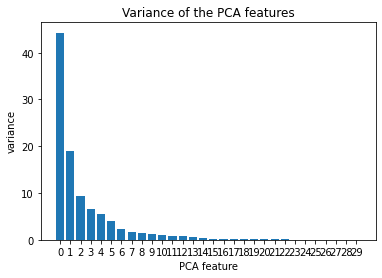

In [10]:
# Plot the explained variances
import matplotlib.pyplot as plt

features = range(pca.n_components_)
pr_var = pca.explained_variance_ratio_*100 # to see scales as a percetange

plt.bar(features, pr_var)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Variance of the PCA features')
plt.xticks(features)
plt.show()

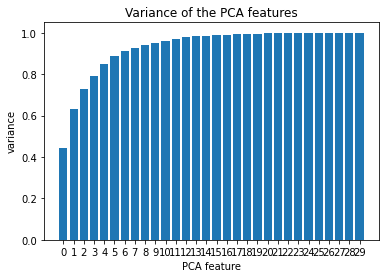

In [15]:
pr_var_cum = pca.explained_variance_ratio_.cumsum()
# with seven component we can explain 90% of the variance in the data set 
plt.bar(features, pr_var_cum)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Variance of the PCA features')
plt.xticks(features)
plt.show()

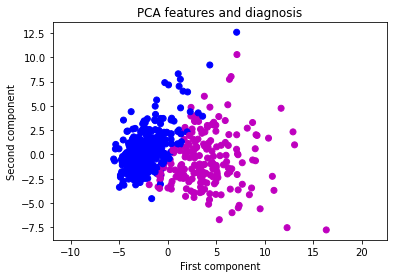

In [21]:
C1 = pca_features[:,0]
C2 = pca_features[:,1]
C3 = pca_features[:,3]

plt.scatter(C1, C2, c=diagnosis)
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

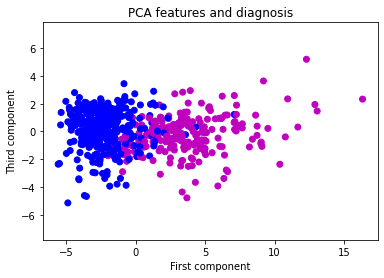

In [22]:
plt.scatter(C1, C3, c=diagnosis)
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Third component')
plt.title('PCA features and diagnosis')
plt.show()

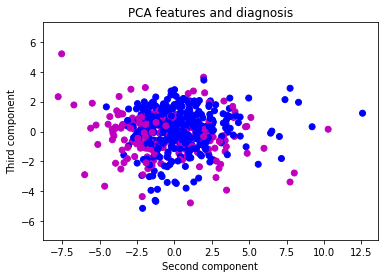

In [23]:
plt.scatter(C2, C3, c=diagnosis)
plt.axis('equal')
plt.xlabel('Second component')
plt.ylabel('Third component')
plt.title('PCA features and diagnosis')
plt.show()

In [24]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(C1, C2)

# Display the correlation
print(correlation)         
# zero correlation 

-4.451734120225481e-16


# Hierarchical clustering

##  Creating a distance matrix using linkage

In [25]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

wisc_data_pca = pca_features[:,0:7]

# analysis on the PCA 
# Calculate the linkage: mergings
hclust_comp = linkage(wisc_data_pca, method='complete')
hclust_ward = linkage(wisc_data_pca, method='ward')

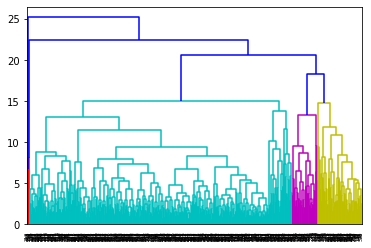

In [26]:
# Plot the dendrogram, using varieties as labels
dendrogram(hclust_comp)
plt.show()

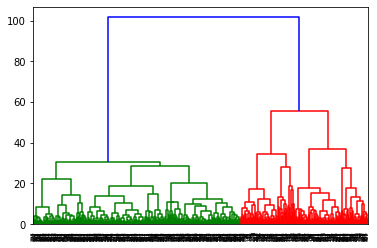

In [27]:
dendrogram(hclust_ward)
plt.show()

### Create cluster labels with fcluster

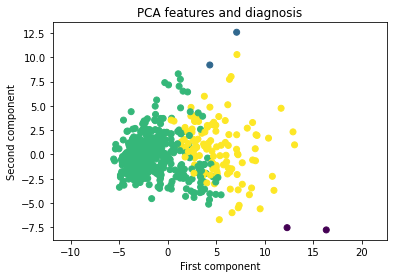

In [35]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels_comp = fcluster(hclust_comp, 20, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df_labels_comp = pd.DataFrame({'labels': labels_comp, 'diagnosis': diagnosis})

plt.scatter(C1, C2, c = df_labels_comp['labels'])
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

In [36]:
# Create crosstab
pd.crosstab(df_labels_comp['labels'], df_labels_comp['diagnosis'])

diagnosis,B,M
labels,,
1,0,2
2,2,0
3,350,97
4,5,113


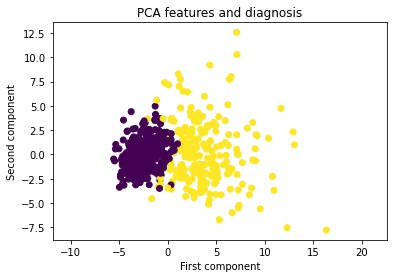

In [37]:
# Use fcluster to extract labels: labels
labels_ward = fcluster(hclust_ward, 80, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df_labels_ward = pd.DataFrame({'labels': labels_ward, 'diagnosis': diagnosis})

plt.scatter(C1, C2, c = df_labels_ward['labels'])

plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

In [38]:
# Create crosstab
pd.crosstab(df_labels_ward['labels'], df_labels_ward['diagnosis'])

diagnosis,B,M
labels,,
1,329,24
2,28,188


# K means 

`n_clusters`: number of clusters to form and number of centroids to generate
`init`: method for initialization
- `k-means++`: K-Means++ [default]
- `random`: K-Means

`random_state`: the seed used by the random number generator [optional]

In [40]:
from sklearn.cluster import KMeans 

# Create a KMeans instance with 2 clusters: model
k2_means = KMeans(n_clusters = 2)
k4_means = KMeans(n_clusters = 4)

# Fit model to points
k2_means.fit(wisc_data_pca)
k4_means.fit(wisc_data_pca)

KMeans(n_clusters=4)

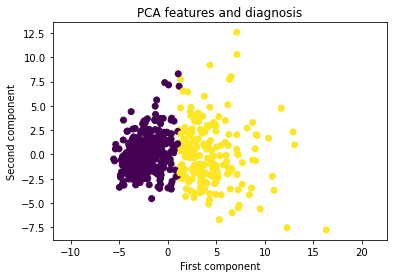

In [41]:
# Determine the cluster labels of new_points: labels
k2_labels = k2_means.predict(wisc_data_pca)

# Create a DataFrame with labels and varieties as columns: df
df_labels_k2 = pd.DataFrame({'labels': k2_labels, 'diagnosis': diagnosis})

plt.scatter(C1, C2, c = df_labels_k2['labels'])
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

In [42]:
# Create crosstab
pd.crosstab(df_labels_k2['labels'], df_labels_k2['diagnosis'])

diagnosis,B,M
labels,,
0,343,37
1,14,175


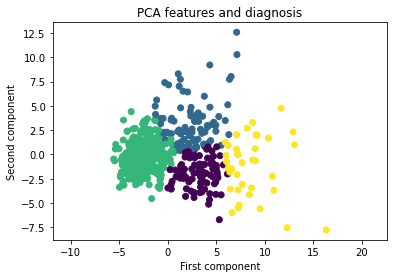

In [43]:
# Determine the cluster labels of new_points: labels
k4_labels = k4_means.predict(wisc_data_pca)

# Create a DataFrame with labels and varieties as columns: df
df_labels_k4 = pd.DataFrame({'labels': k4_labels, 'diagnosis': diagnosis})

plt.scatter(C1, C2, c = df_labels_k4['labels'])
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

In [44]:
pd.crosstab(df_labels_k4['labels'], df_labels_k4['diagnosis'])

diagnosis,B,M
labels,,
0,0,97
1,36,54
2,321,24
3,0,37
